In [22]:
import yfinance as yf  # For stock data
import pandas as pd    # For data manipulation
import numpy as np     # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import datetime as dt

In [23]:
nasdaq_top15 = [
    "NVDA",   # NVIDIA
    "AAPL",   # Apple Inc.
    "MSFT",   # Microsoft Corp.
    "AMZN",   # Amazon.com Inc.
    "GOOGL",  # Alphabet Inc. Class A
    "GOOG",   # Alphabet Inc. Class C
    "AVGO",   # Broadcom Inc.
    "META",   # Meta Platforms
    "TSLA",   # Tesla, Inc.
    "ASML",   # ASML Holding
    "PLTR",   # Palantir Technologies
    "NFLX",   # Netflix, Inc.
    "COST",   # Costco Wholesale
    "AMD",    # Advanced Micro Devices
    "MU"      # Micron Technology
]

<Axes: xlabel='Date'>

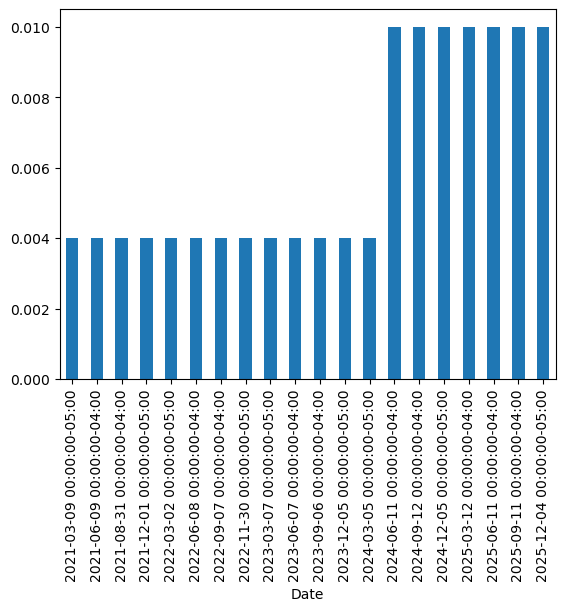

In [24]:
# Define parameters
ticker = "NVDA"  # NVDIA
start_date = ""
end_date = ""

# Download historical stock data
data = yf.Ticker(ticker)

# Display first few rows
#data.dividends.head(20).plot(kind='bar')
#print("----------------------")

#Display last few rows
data.dividends.tail(20).plot(kind='bar')



In [25]:
data_df = data.financials.T 

In [26]:
data_df.columns

Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA', 'Total Unusual Items',
       'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Total Operating Income As Reported',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Net Income',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Income Expense', 'Other Non Operating Income Expenses',
       'Special Income Charges', 'Restructuring And Mergern Acquisition',
  

In [27]:
data_df['Net Income']

2025-01-31    7.288000e+10
2024-01-31    2.976000e+10
2023-01-31    4.368000e+09
2022-01-31    9.752000e+09
Name: Net Income, dtype: float64

In [28]:
net_income_list=[]  #define new array

for ti in nasdaq_top15[0:5]: #loop thorugh nasdaq from 1-5

    data_df = yf.Ticker(ti)
    data_df = data_df.financials.T['Net Income']
    net_income_list.append(data_df.rename(ti))

In [29]:
net_income_list

[2025-01-31    7.288000e+10
 2024-01-31    2.976000e+10
 2023-01-31    4.368000e+09
 2022-01-31    9.752000e+09
 Name: NVDA, dtype: float64,
 2025-09-30    1.120100e+11
 2024-09-30    9.373600e+10
 2023-09-30    9.699500e+10
 2022-09-30    9.980300e+10
 2021-09-30             NaN
 Name: AAPL, dtype: float64,
 2025-06-30    1.018320e+11
 2024-06-30    8.813600e+10
 2023-06-30    7.236100e+10
 2022-06-30    7.273800e+10
 Name: MSFT, dtype: float64,
 2024-12-31    5.924800e+10
 2023-12-31    3.042500e+10
 2022-12-31   -2.722000e+09
 2021-12-31    3.336400e+10
 Name: AMZN, dtype: float64,
 2024-12-31    1.001180e+11
 2023-12-31    7.379500e+10
 2022-12-31    5.997200e+10
 2021-12-31    7.603300e+10
 Name: GOOGL, dtype: float64]

In [30]:
net_income_df = pd.concat(net_income_list, axis = 1)
net_income_df

,NVDA,AAPL,MSFT,AMZN,GOOGL
2021-09-30,NaN,NaN,NaN,NaN,NaN
2021-12-31,NaN,NaN,NaN,3.336400e+10,7.603300e+10
2022-01-31,9.752000e+09,NaN,NaN,NaN,NaN
2022-06-30,NaN,NaN,7.273800e+10,NaN,NaN
2022-09-30,NaN,9.980300e+10,NaN,NaN,NaN
2022-12-31,NaN,NaN,NaN,-2.722000e+09,5.997200e+10
2023-01-31,4.368000e+09,NaN,NaN,NaN,NaN
2023-06-30,NaN,NaN,7.236100e+10,NaN,NaN
2023-09-30,NaN,9.699500e+10,NaN,NaN,NaN
2023-12-31,NaN,NaN,NaN,3.042500e+10,7.379500e+10


<Axes: title={'center': 'Net Income Comparison of Top Nasdaq Companies'}>

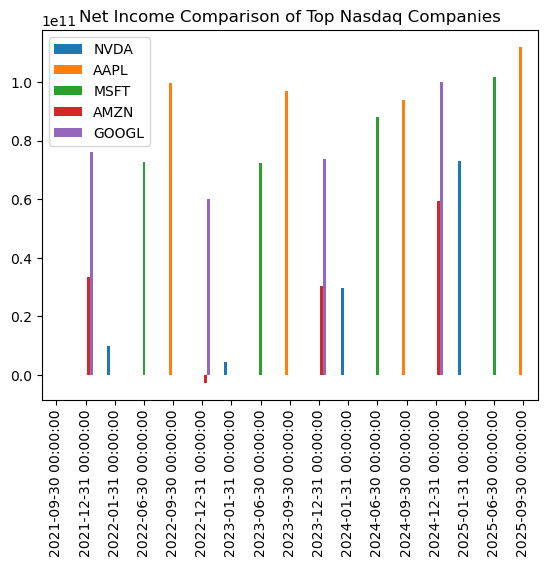

In [31]:
net_income_df.plot(kind='bar', title='Net Income Comparison of Top Nasdaq Companies')

In [32]:
def get_date_x_days_before(date_string, num_days_before):
    date_object = dt.datetime.strptime(date_string, "%Y-%m-%d")
    new_date = date_object - dt.timedelta(days=num_days_before)
    new_date_string = new_date.strftime("%Y-%m-%d")
    return new_date_string

stock       = "AAPL"
start_date  = "2020-01-01"
end_date    = "2026-01-7"
num_periods = 20

# Get a few days before the start date to accommodate the period size
start_date_x_days_before = get_date_x_days_before(start_date, num_periods*2)

# Grab the stock data
stock_data = yf.download(stock, start=start_date_x_days_before, end=end_date)

# Compute the simple moving average (SMA)
stock_data["SMA"] = stock_data["Close"].rolling(window=num_periods).mean()

# Now that we calculated the SMA, we can remove the dates before the actual
# start date that we want.
stock_data = stock_data[start_date:]

[*********************100%***********************]  1 of 1 completed


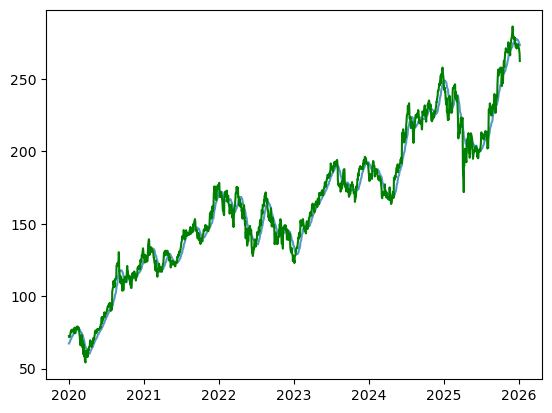

In [33]:
plt.plot(stock_data["SMA"], label='SMA', alpha=0.75)
plt.plot(stock_data['Close'], label='Closing Price', color='green')